In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import association_metrics as am

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


from imblearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# 1. Data overview

In [2]:
# load data   (Except the last two lines & the first line (ID))
df = pd.read_csv('BankChurners.csv').iloc[:,1:-2] 
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 1.1  Check data

In [3]:
print('The shape of the data : ',df.shape)
print('-'*70)
print('')
df.info()

The shape of the data :  (10127, 20)
----------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_

In [4]:
df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

In [5]:
# Descriptive analysis for numerical data
df.describe().round(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503
max,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999


In [6]:
# Descriptive analysis for categorical data
df.describe(include='object')  

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [7]:
# Target feature
target_col = ['Attrition_Flag']

# categorical feature
cat_cols = df.select_dtypes(include='object').columns.tolist() 
cat_cols = [col for col in cat_cols if col not in target_col]

# numerical feature : continuous + discrete 
num_cols = df.select_dtypes(include='number').columns.tolist() # 等同 [x for x in df.columns if x not in target_col + cat_cols]
# discrete :
disc_cols = df.nunique()[df.nunique() < 8].keys().tolist()
disc_cols = [col for col in disc_cols if col not in target_col+cat_cols]
# continuous :
cont_cols = [col for col in num_cols if col not in disc_cols]


print('numeric_continuous features : \n', cont_cols)
print('-'*70)
print('numeric_discrete features : \n', disc_cols)
print('-'*70)
print('categorical feature : \n', cat_cols)


numeric_continuous features : 
 ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
----------------------------------------------------------------------
numeric_discrete features : 
 ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
----------------------------------------------------------------------
categorical feature : 
 ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [8]:
# the unique values ​​for categorical features
for i in list(cat_cols):
    print('---------------------------')
    print('{0} 的唯一值如下：{1}'.format(i,df[i].nunique()))
    print(df[i].unique())

---------------------------
Gender 的唯一值如下：2
['M' 'F']
---------------------------
Education_Level 的唯一值如下：7
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
---------------------------
Marital_Status 的唯一值如下：4
['Married' 'Single' 'Unknown' 'Divorced']
---------------------------
Income_Category 的唯一值如下：6
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
---------------------------
Card_Category 的唯一值如下：4
['Blue' 'Gold' 'Silver' 'Platinum']


## 1.2 Missing value check

In [9]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

* 雖然上面沒有nan的缺失值，但在分類變量中卻有unknown
* Nan 值一個單獨的類（unknown）是處理分類變量中缺失值的一種方法

## 1.3 Duplicated values check

In [10]:
print('Number of duplicated values in dataset: ', df.duplicated().sum())

Number of duplicated values in dataset:  0


# 2. Visualizing The Data

### EDA tasks:

* <b>Check the target variable: <b>
    
    - Attrition_Flag: if the account is closed then 1 else 0.

    
* <b>Check the demographic variables: <b>
    
    - Customer_Age : Customer's Age in Years.
    - Gender : M=Male, F=Female.
    - Dependent_count : Number of dependents.
    - Education_Level : Educational Qualification of the account holder
    - Marital_Status : Married, Single, Divorced, Unknown.
    - Income_Category : Annual Income Category of the account holder
    
* <b>Check the product variables: <b>
    
    - Card_Category : Type of Card (Blue, Silver, Gold, Platinum).
    - Number of products (Total_Relationship_Count) : Total no. of products held by the customer.
    - Inactive months (Months_Inactive_12_mon) : No. of Months in the last 12 months.
    - Number of contacts (Contacts_Count_12_mon) : No. of Contacts in the last 12 months.
    - Relationship with the bank
    - Credit Limit : Credit Limit on the Credit Card
    - Total resolving balance : Total Revolving Balance on the Credit Card.
    - Openness To Buy Credit Line (Avg_Open_To_Buy) : Open to Buy Credit Line (Average of last 12 months)
    - Transaction Amount 
        -  Total_Trans_Amt: Total Transaction Amount (Last 12 months).
        -  Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1).
    - Transaction Count 
        -  Total_Trans_Ct: Total Transaction Count (Last 12 months).
        -  Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1).
    - Average Card Utilization Ratio (Avg_Utilization_Ratio)

In [11]:
## Functions

df2 = df.copy()
df2['Attrition_Flag'].replace({'Attrited Customer':1,'Existing Customer':0}, inplace=True)

# the visualization functions of categorical/discrete features
def plot_categorical(col):
    fig, axes = plt.subplots(1,3, figsize=(24, 8))

    # Pie chart showing proportions
    size=0.35
    feature = df2[col].value_counts().sort_index()   #  sort_index() sort discrete variables according to index
    axes[0].pie(feature, labels=feature.index, autopct='%1.1f%%', pctdistance=0.7,textprops={'size':15},
                   colors=sns.color_palette('Set2'),radius=1-size, wedgeprops=dict(width=size, edgecolor='w'))
    axes[0].axis('equal')
    
    # countplot for the total counts of each category
    sns.countplot(x=col, hue='Attrition_Flag', data=df2,  order=feature.index, palette=sns.color_palette('Set2'),  ax=axes[1]) 
    axes[1].set_ylabel('Count')
    legend=axes[1].legend(title='Churn', labels=['No', 'Yes'], fontsize=20)
    legend.get_title().set_fontsize('20')  #legend 'Title' fontsize

    #  barplot for the churn rate  
    sns.barplot(x=col, y='Attrition_Flag', data=df2, order=feature.index, ci=None, palette=sns.color_palette('Set2'),  ax=axes[2]) 
    axes[2].set_ylabel('Churn rate')


# the visualization functions of continuous features
def plot_distplot(num):    
    fig, axes = plt.subplots(1,2, figsize=(20, 5))
    sns.kdeplot(df[num],color='forestgreen', shade = True, ax=axes[0])
    
    sns.kdeplot(df[num][(df["Attrition_Flag"] == 'Existing Customer')],color='cornflowerblue', shade = True, ax=axes[1])
    sns.kdeplot(df[num][(df["Attrition_Flag"] == 'Attrited Customer')],color='salmon', shade = True, ax=axes[1])
    axes[1].legend(["Not Churn","Churn"],loc='upper right');
    axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=20)

## 2.1 Target variable

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


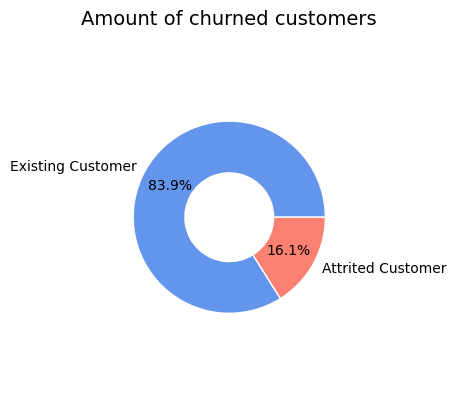

In [12]:
target = df["Attrition_Flag"].value_counts()
print(target)

fig = plt.figure() 
size = 0.35
plt.pie(target, labels=['Existing Customer', 'Attrited Customer'], autopct='%1.1f%%', pctdistance=0.7,
       colors=['cornflowerblue','salmon'], radius = 1-size, wedgeprops=dict(width=size, edgecolor='w'))
plt.title("Amount of churned customers", fontsize=14)
plt.show()

目標變量的比例失衡，需要進一步做處理來避免預測不精準。


## 2.2 Demographic variables

### 2.2.1 Age 

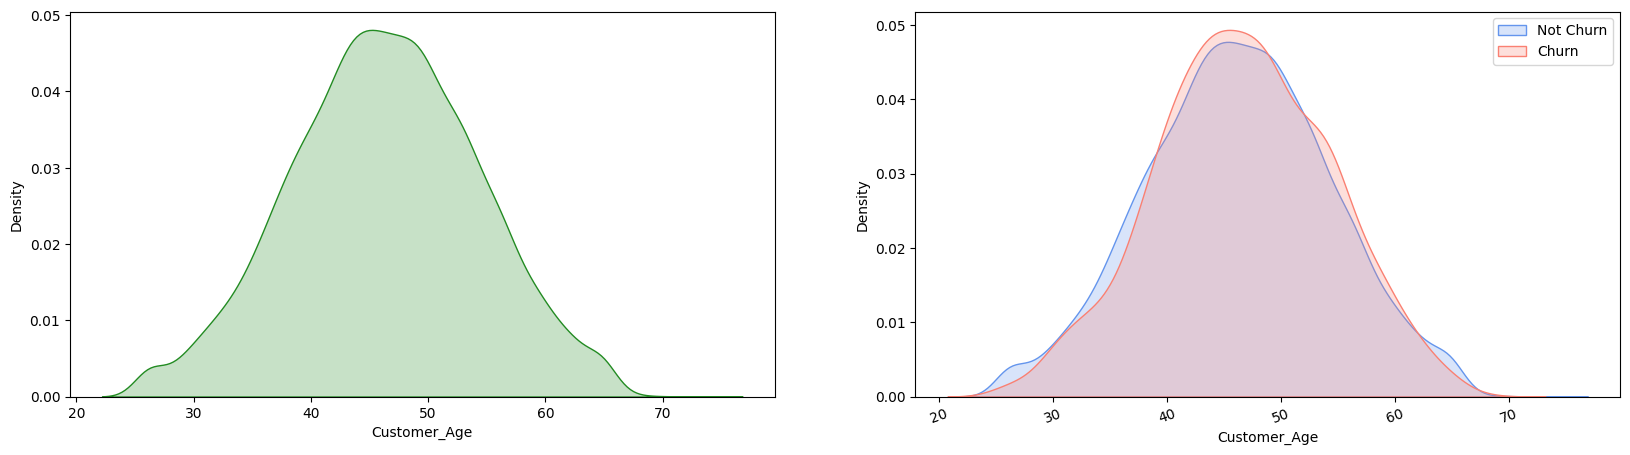

In [13]:
plot_distplot('Customer_Age')

年齡呈常態分佈，大多數集中在40-50區間。，且其 流失/未流失 兩者的資料狀態相似，可以推測年齡與是否流失"無關"。

### 2.2.2 Gender

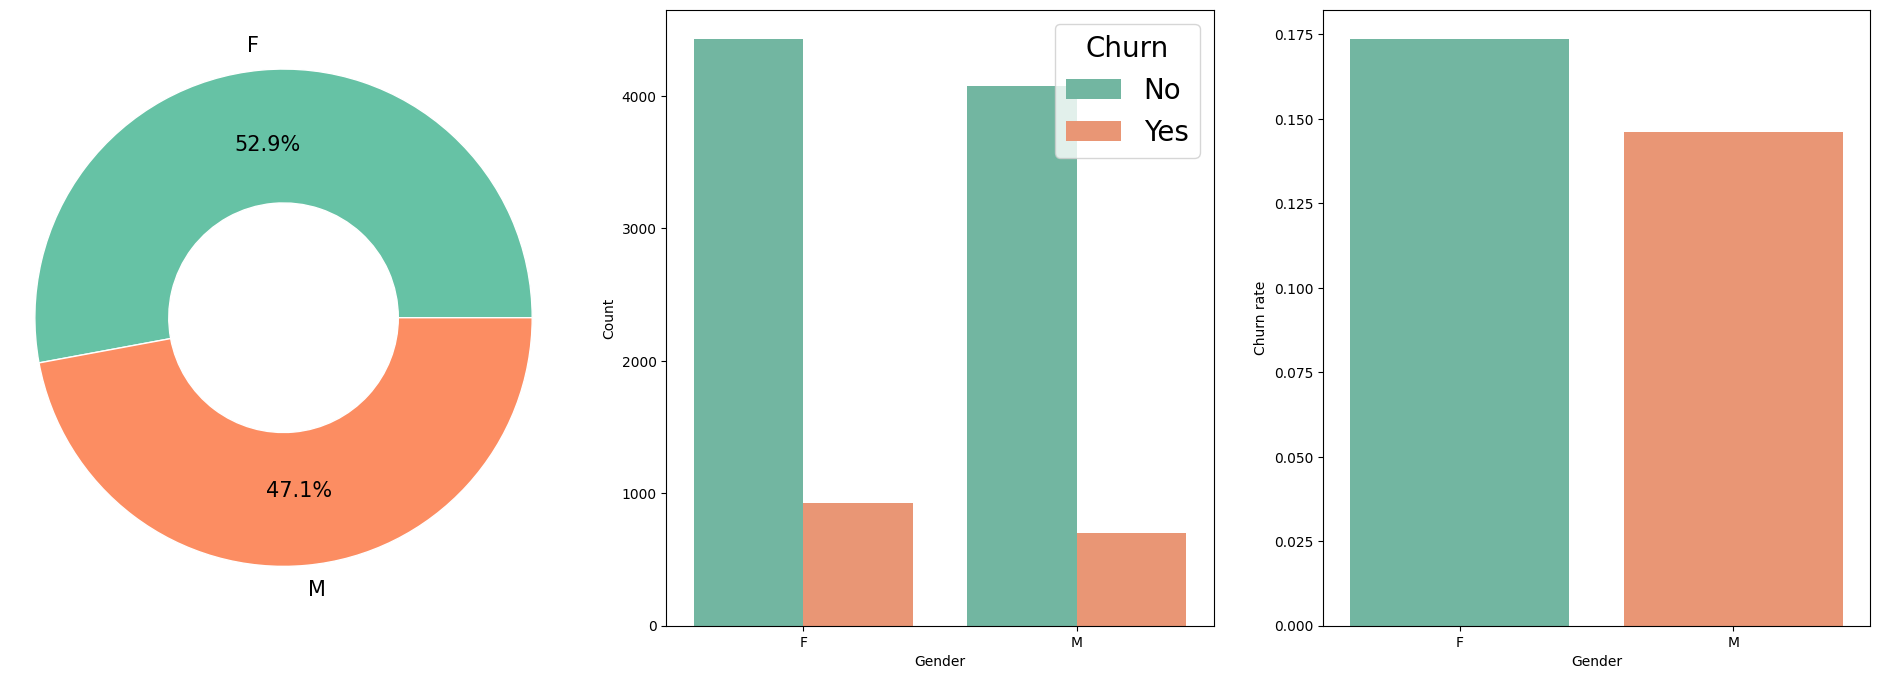

In [14]:
plot_categorical('Gender')

在總體資料中性別比例差不多，且兩者的流失比率相差不多，為女性用戶稍微高一點點。

### 2.2.3 Dependent_count

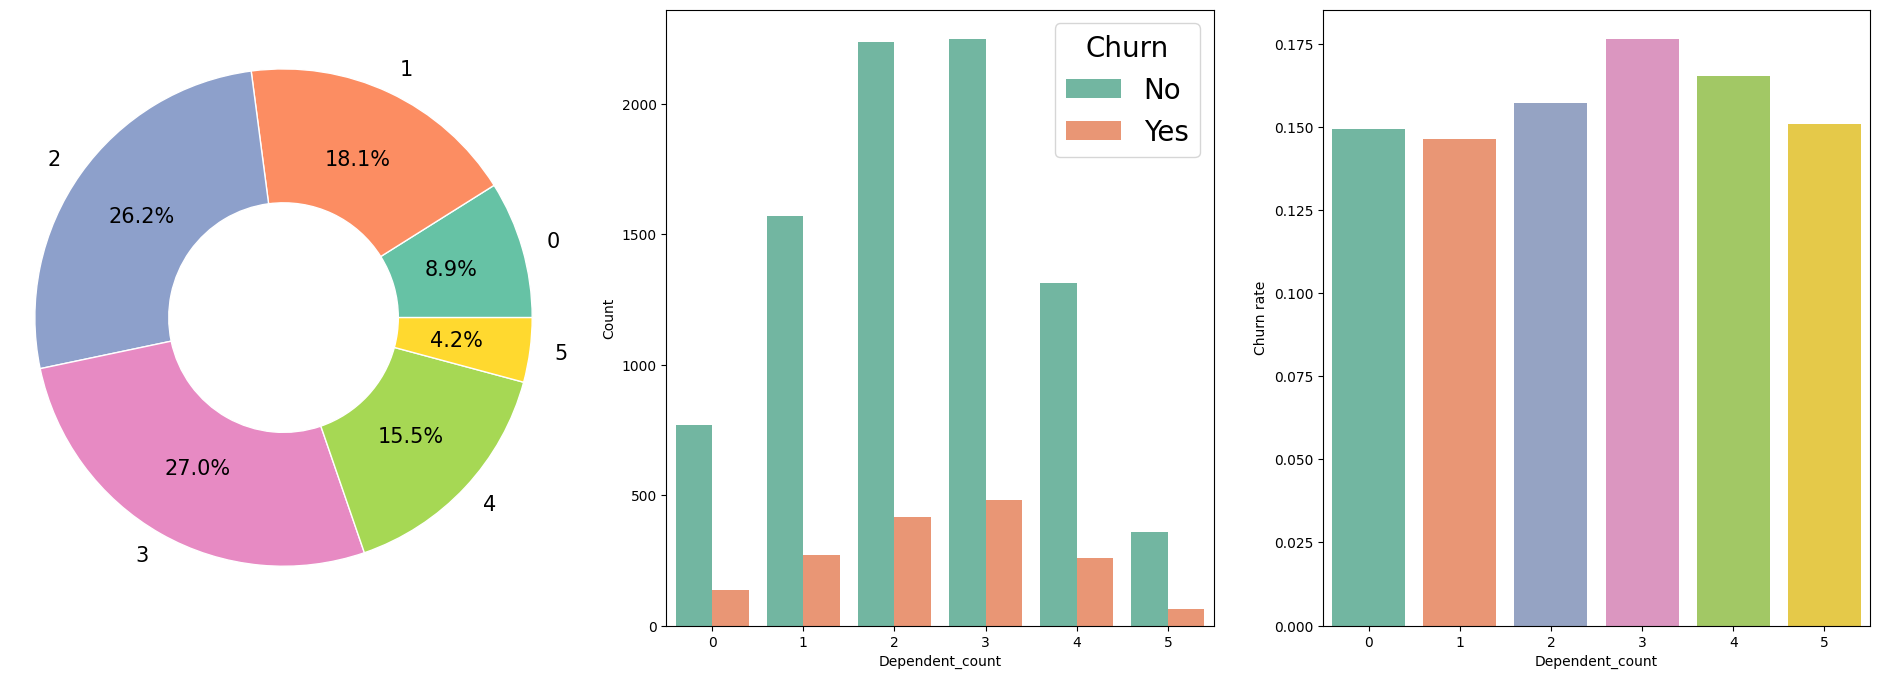

In [15]:
plot_categorical('Dependent_count')

大多數人具有研究生教育水平，其次是高中。 約有 15% 的人口的教育水平未知。 而不同類別間的流失率相差不大。

### 2.2.4 Education_Level

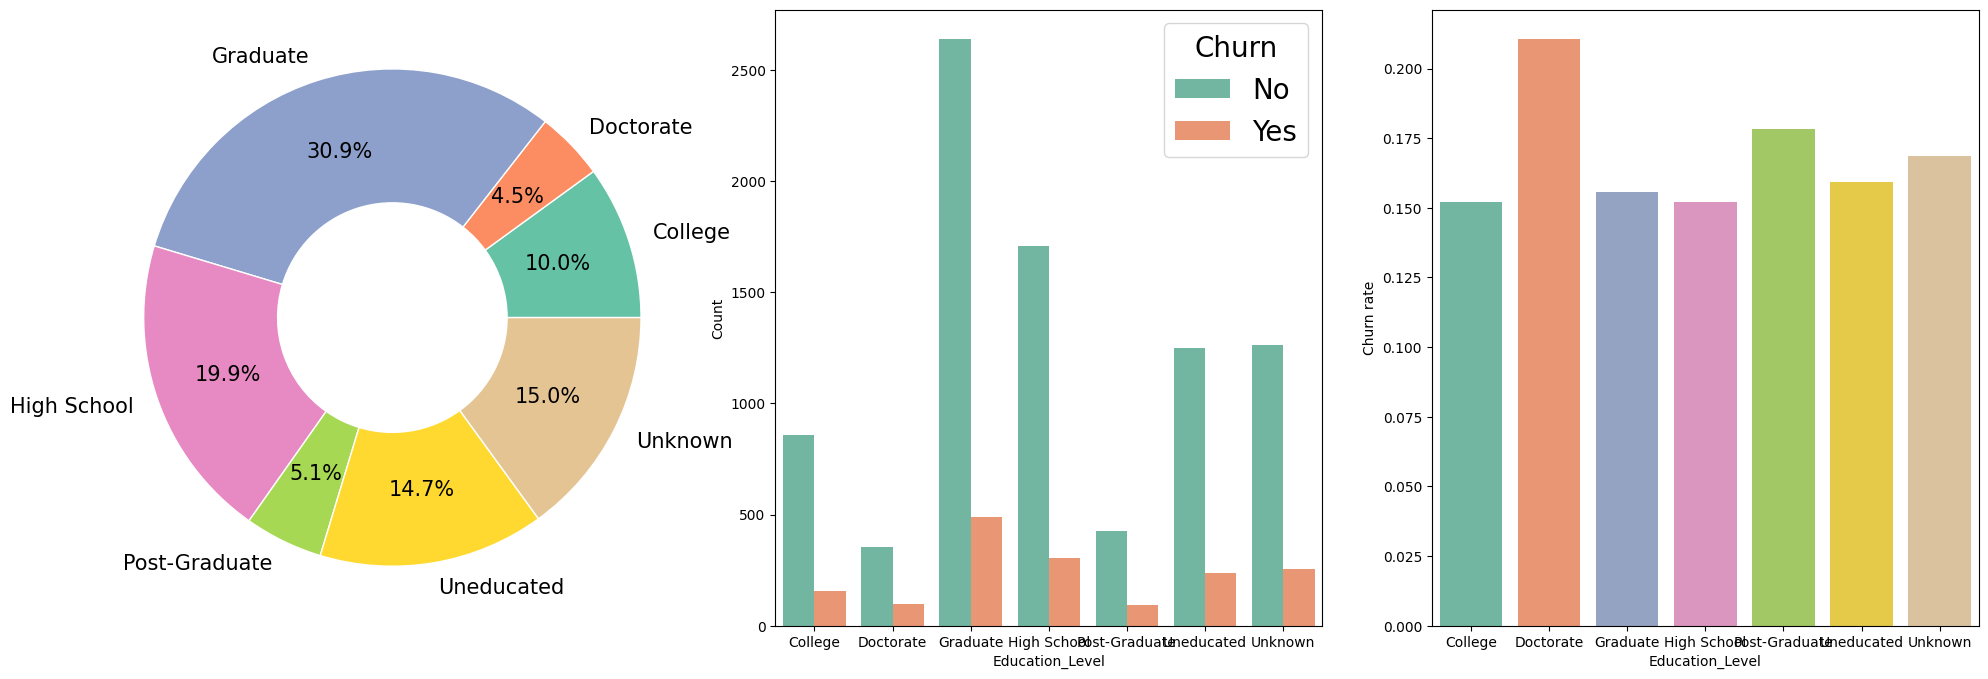

In [16]:
plot_categorical('Education_Level')

大多數人具有研究生教育水平，其次是高中。  有15% 的人口的教育水平未知。
除了Doctorate的流失率稍微高一點點，其餘皆差不多。

### 2.2.5 Marital_Status

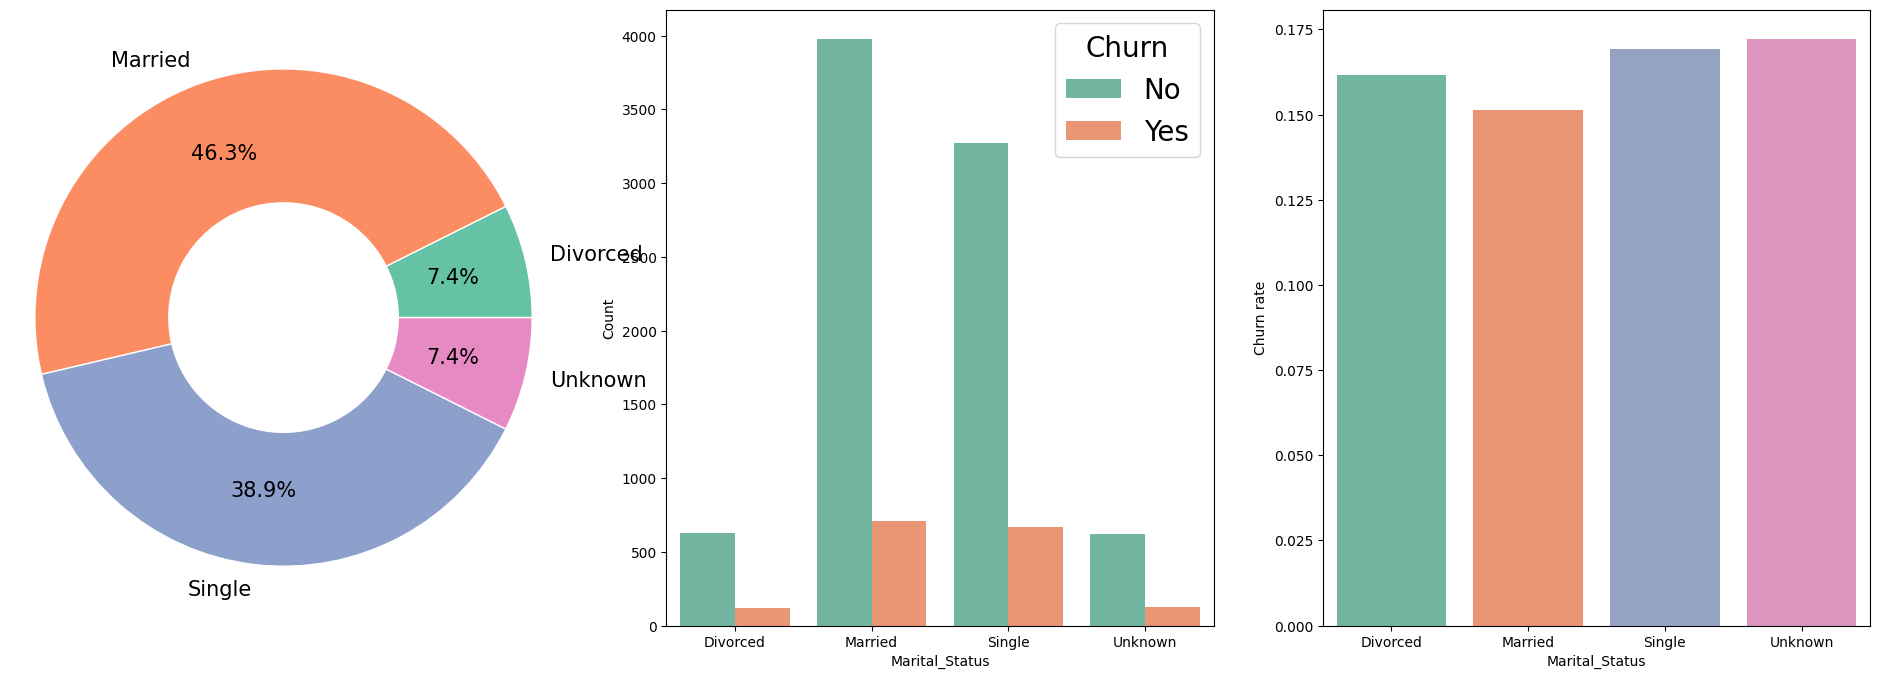

In [17]:
plot_categorical('Marital_Status')

已婚比例佔第一位，其流失率比其他種類略低一點。

### 2.2.6 Income_Category

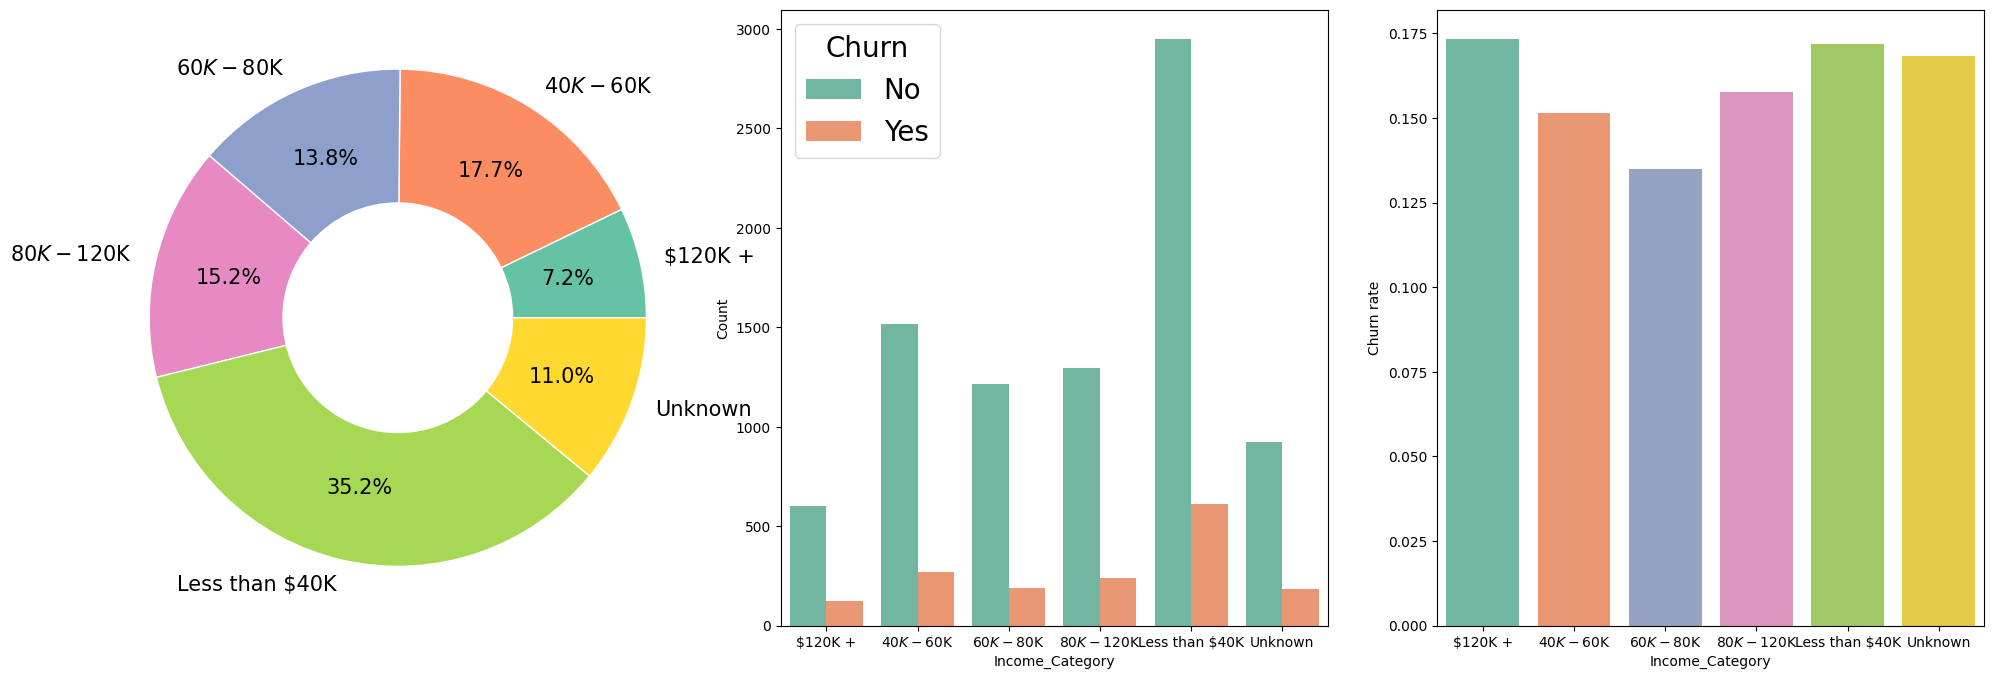

In [18]:
plot_categorical('Income_Category')

資料集中約有一半的人收入在60K以下。

 

* <b> 小結: <b>

1. 對於人口相關特徵，絕大多數特徵的分布/流失比例 差異都不大。
2. 僅有 Education_Level 與 Income_Category 有小小變動，不過還不能因此推論與流失率有關。



## 2.3  Product variables

### 2.3.1 Card_Category

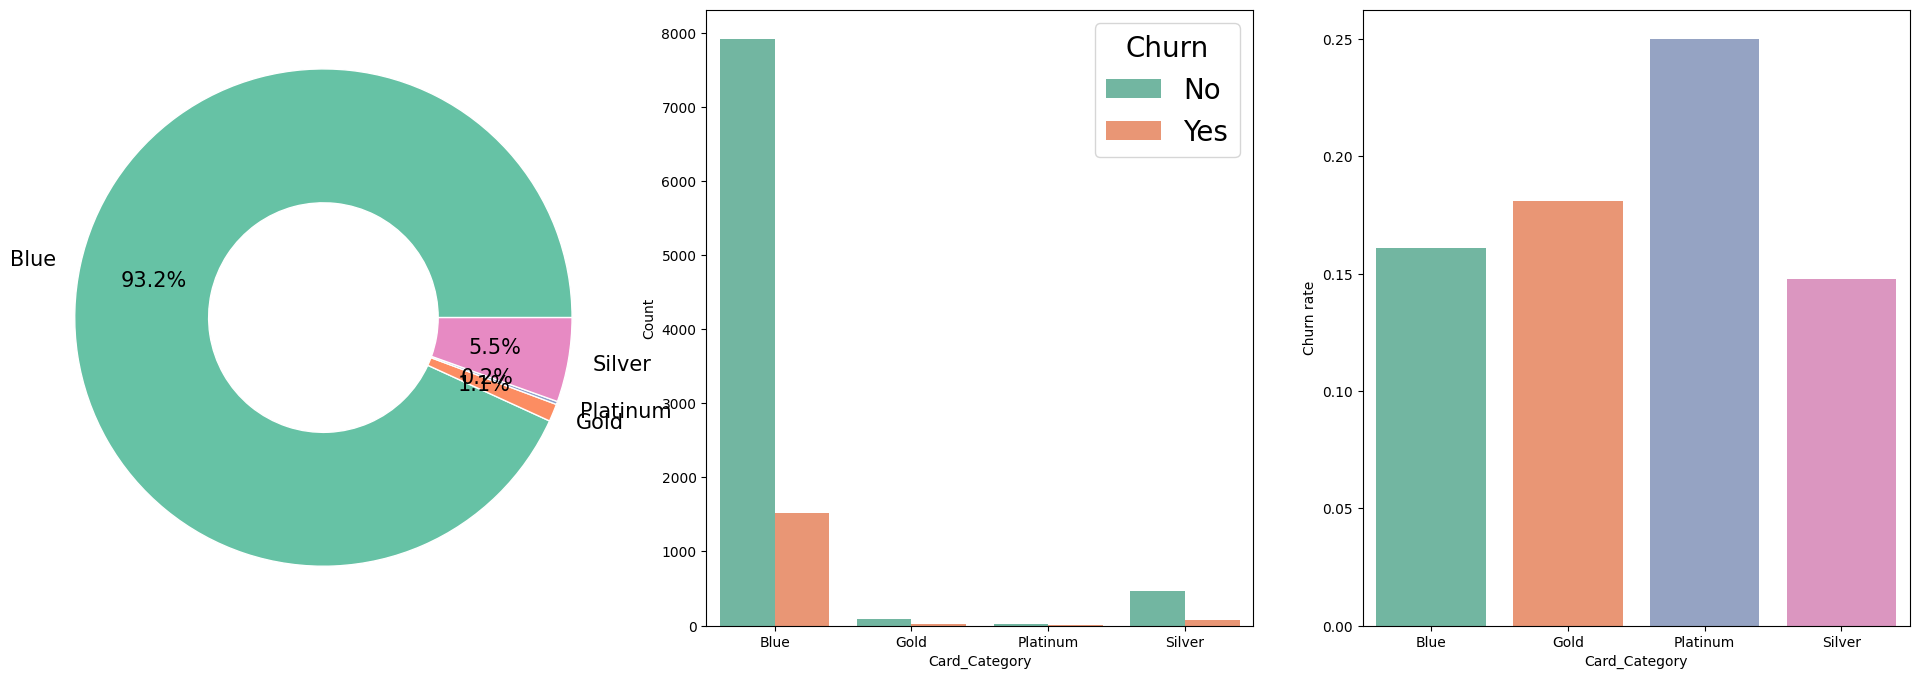

In [19]:
plot_categorical('Card_Category')

幾乎都是藍卡，而Platinum的比例最小，其流失率也是最高的。

### 2.3.2 Number of products

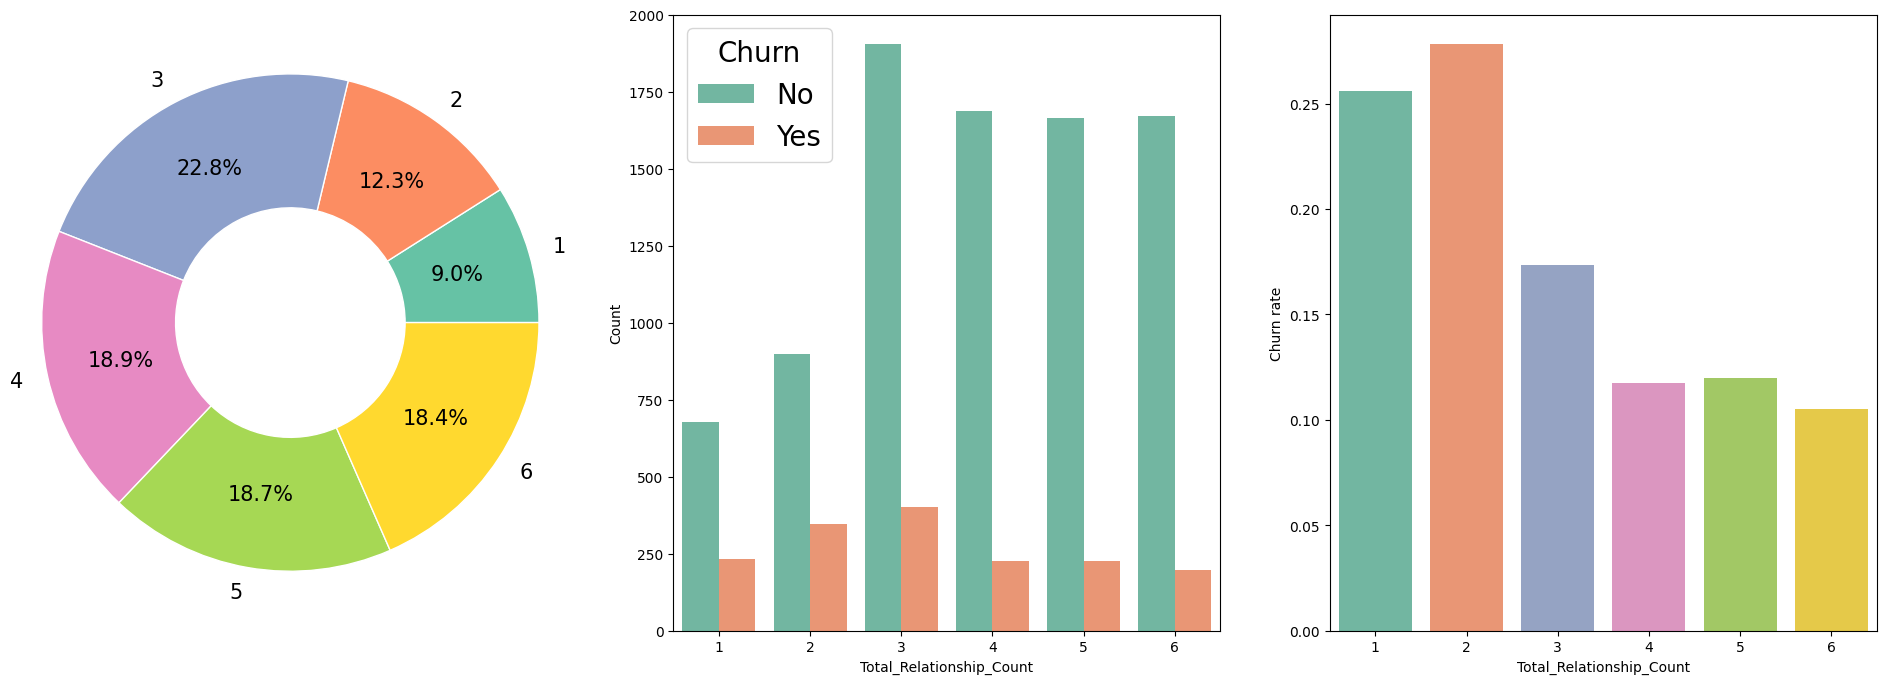

In [20]:
# 客戶持有產品數量
plot_categorical('Total_Relationship_Count')

持有越少的產品量的客戶，其流失率越高。也就是說未流失的顧客往往比流失的顧客購買更多的產品。

### 2.3.3 Inactive months 

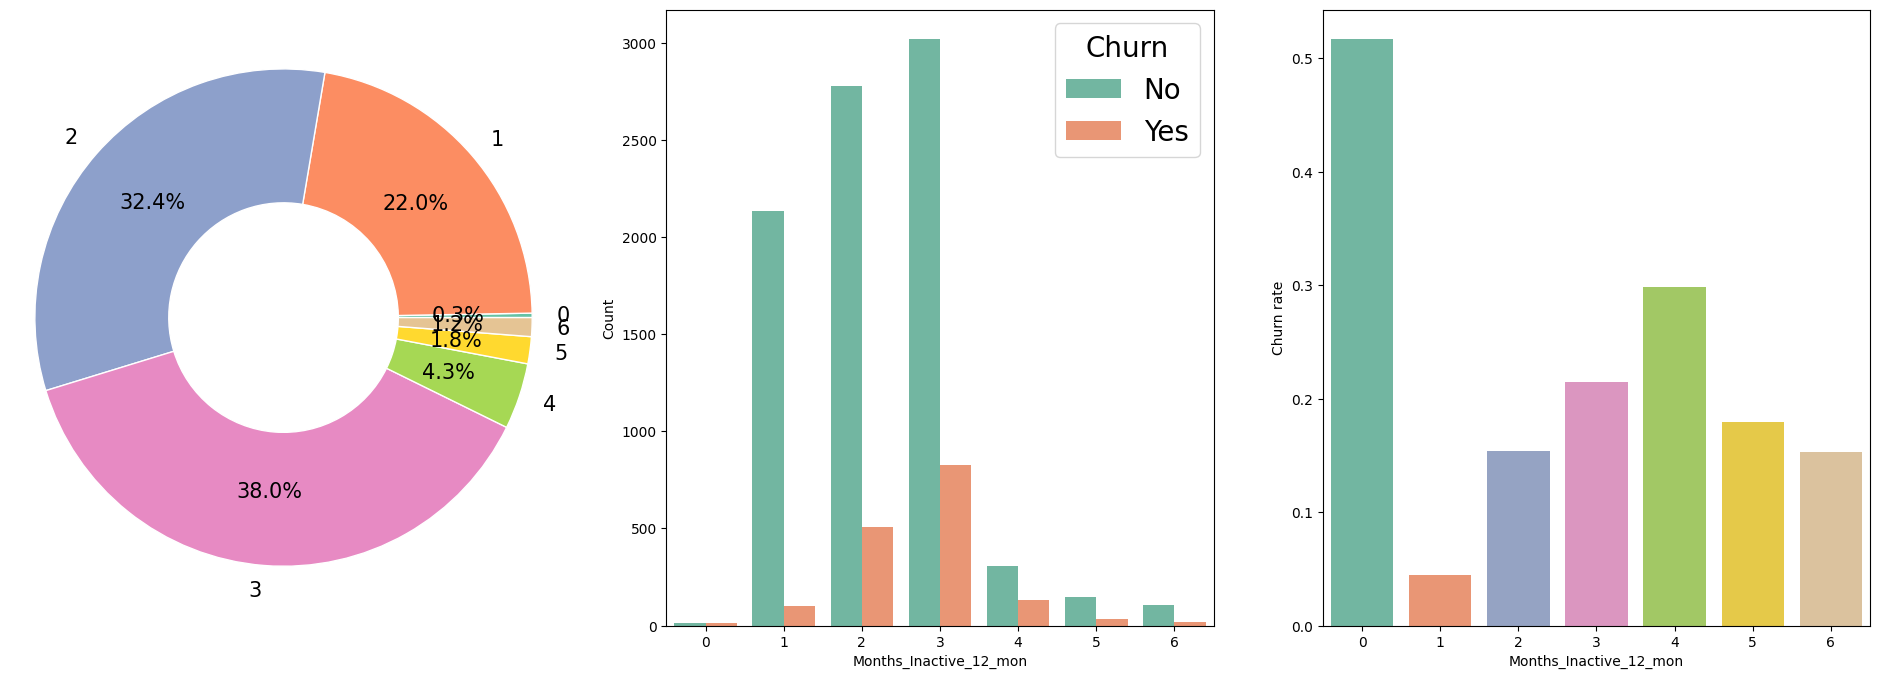

In [21]:
# 過去 12 個月內不活躍的月份數
plot_categorical('Months_Inactive_12_mon')

大多數客戶都顯示 2 or 3 個月不活動。佔比最少的0個月不活動的人(表示積極活動)，其流失率卻是最高的。可能跟此類型的低佔比有關。

### 2.3.4 Number of contacts

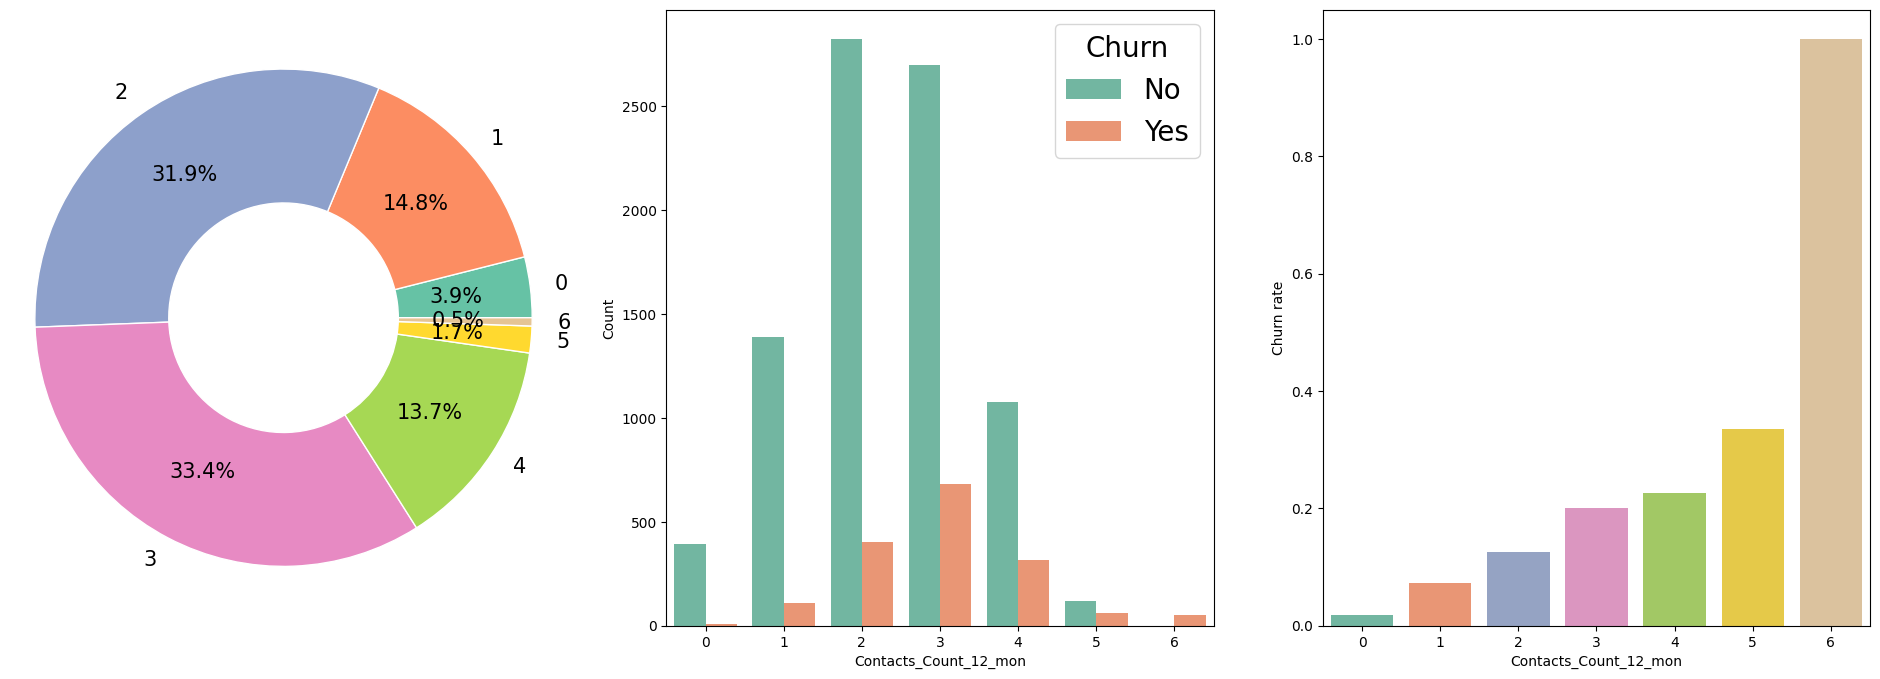

In [22]:
# 最近12個月的聯繫次數
plot_categorical('Contacts_Count_12_mon')

可以看出流失的客戶比非流失的客戶有更多的聯繫。

### 2.3.5 Relationship with the bank 

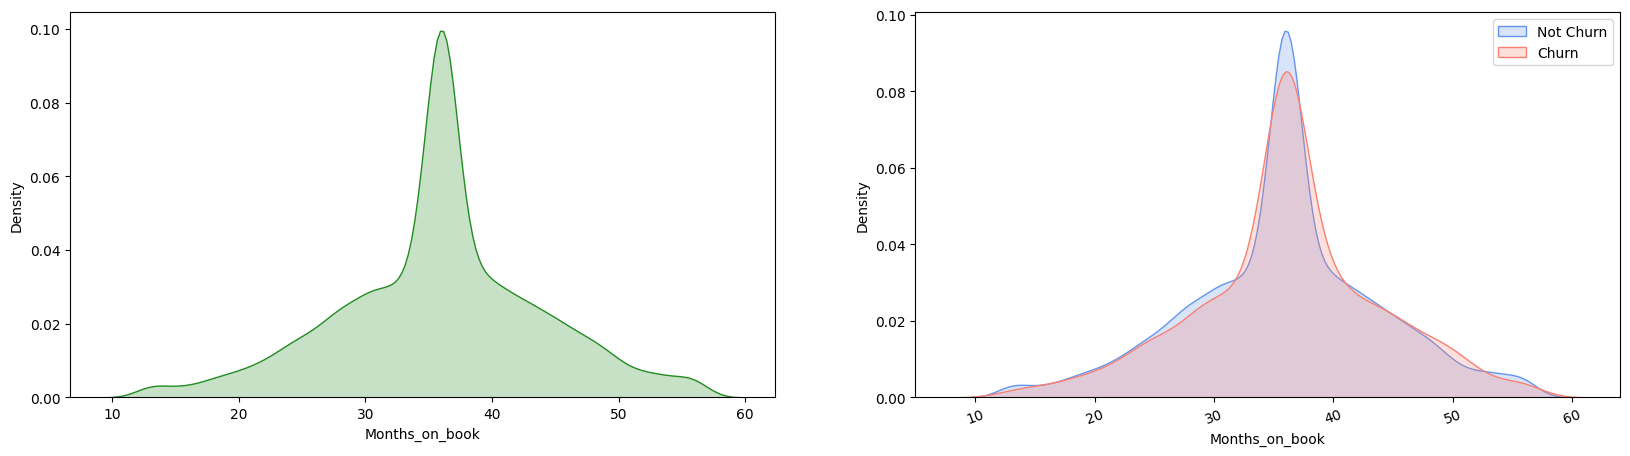

In [23]:
# 與銀行的關係期
plot_distplot('Months_on_book')

與 銀行的關係期 絕大多數集中在35-40區間，且其 流失/未流失 兩者的資料狀態相似。

### 2.3.6 Credit Limit

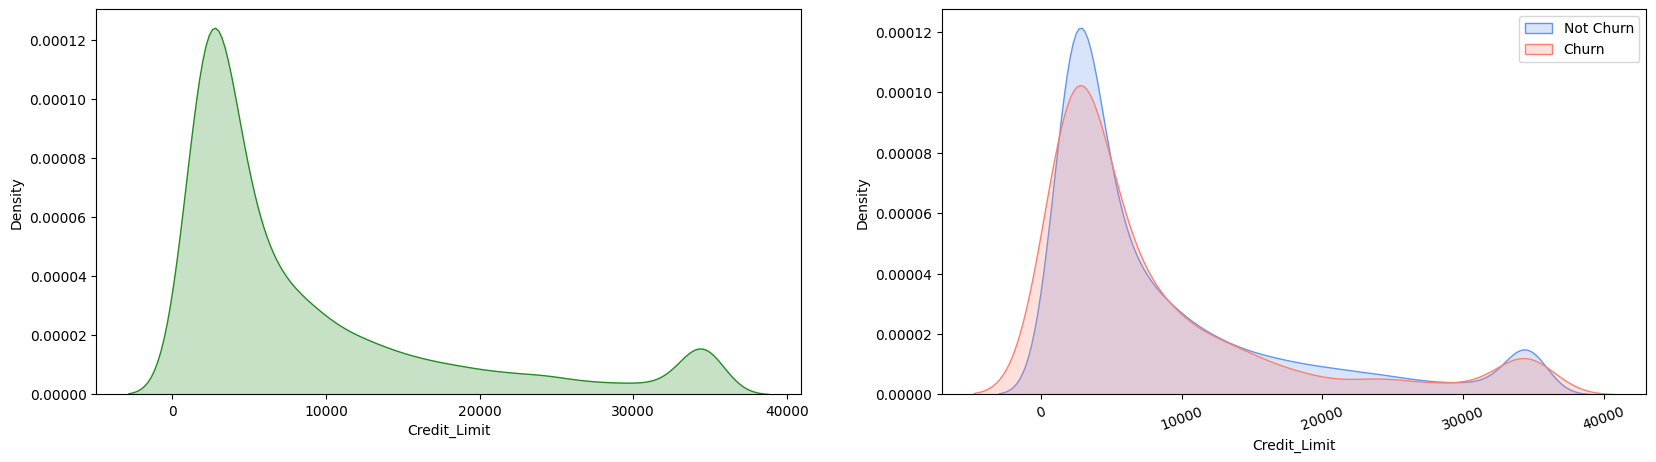

In [24]:
# 信用額度
plot_distplot('Credit_Limit')

Credit Limit(信用額度) 在 流失/未流失 兩者的資料狀態相似，都是右偏分佈。

### 2.3.7 Total resolving balance  

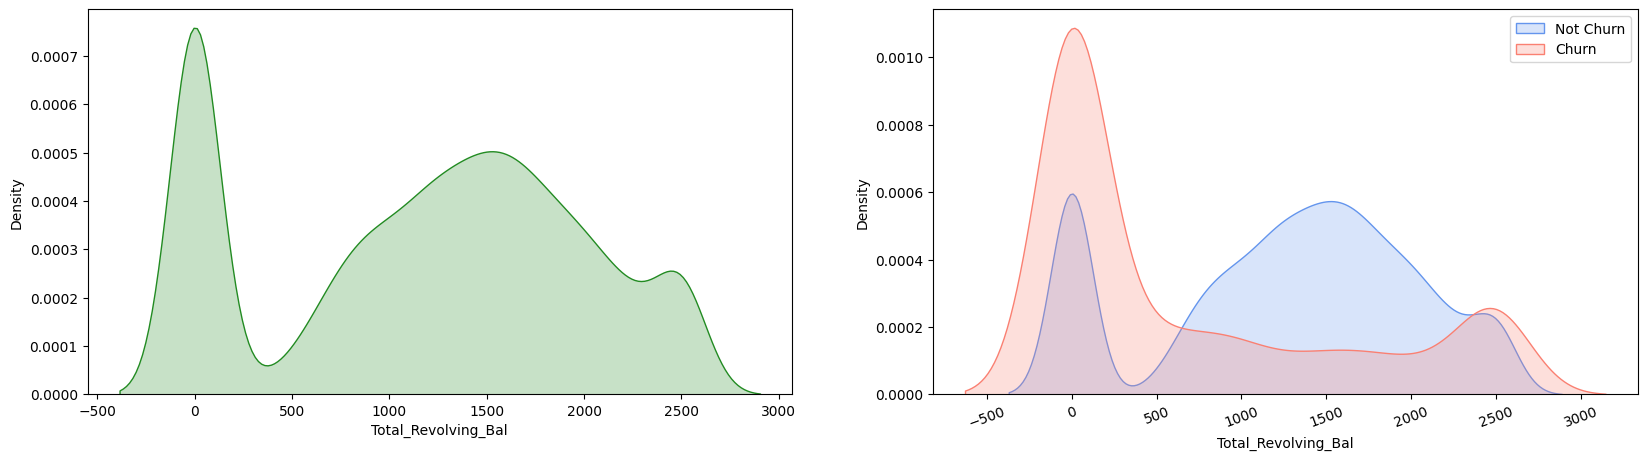

In [25]:
# 信用卡總周轉餘額
plot_distplot('Total_Revolving_Bal')

很明顯，Total resolving balance(信用卡總周轉餘額) 在 流失/未流失 兩者的資料狀態有明顯差異。

### 2.3.8 Openness To Buy Credit Line

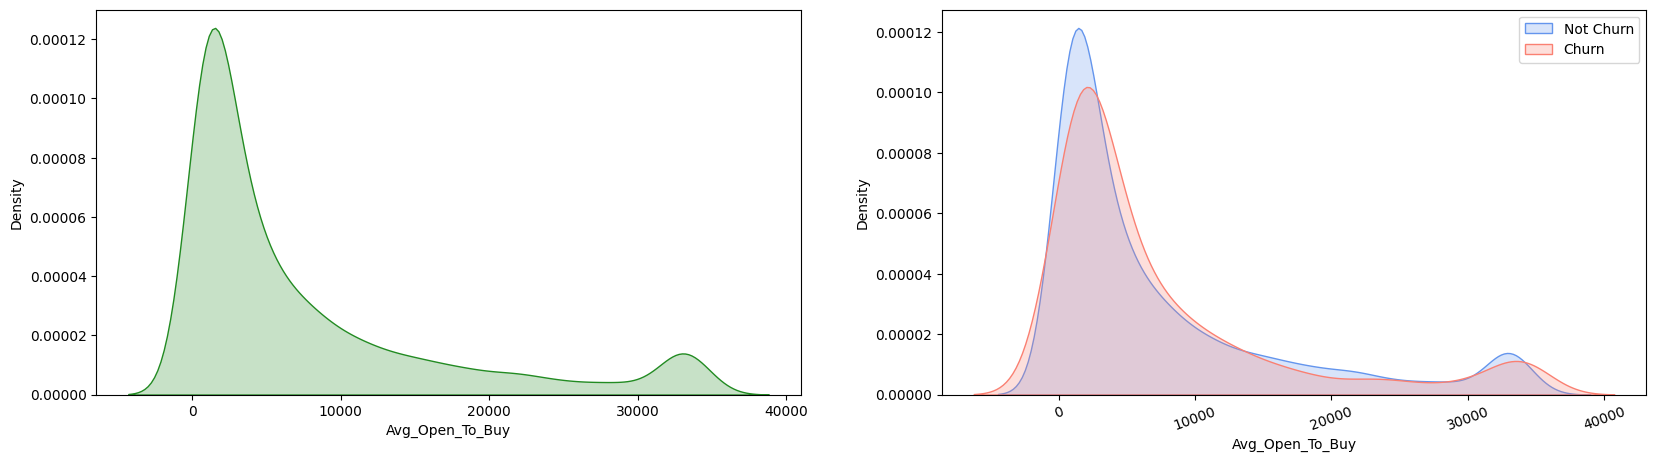

In [26]:
# 開放購買信用額度 (過去12個月的平均值）
plot_distplot('Avg_Open_To_Buy')

Openness To Buy Credit Line(開放購買信用額度) 在 流失/未流失 兩者的資料狀態相似，都是右偏分佈，且也與Credit Line的分佈圖很相似。

### 2.3.9 Transaction Amount Change  

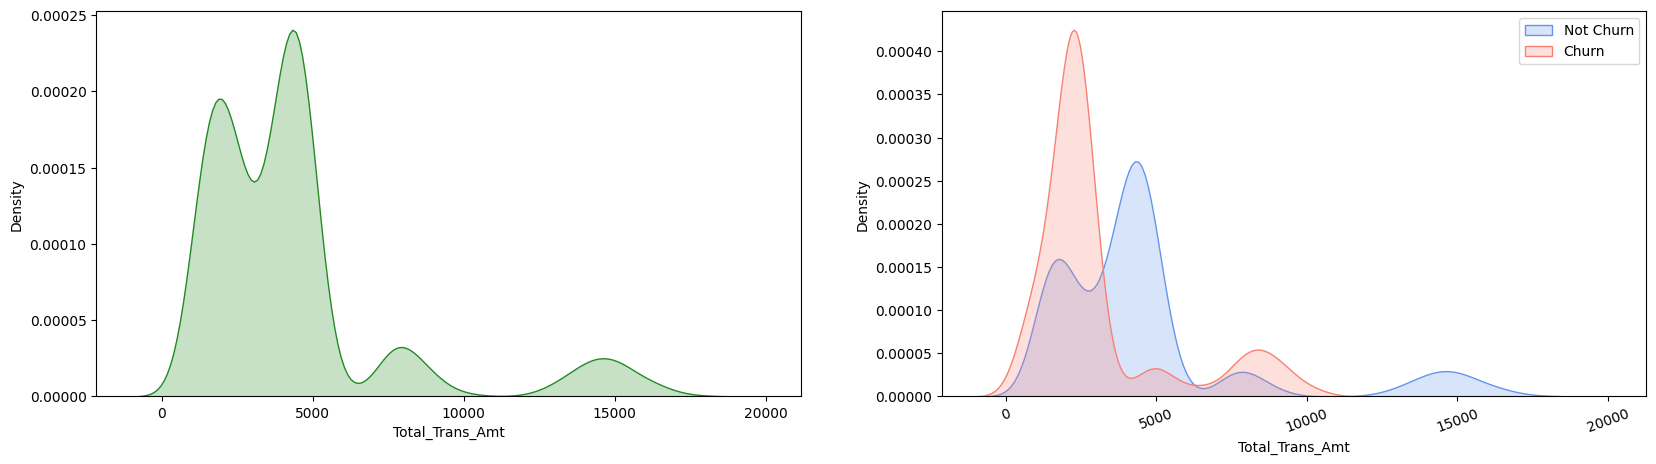

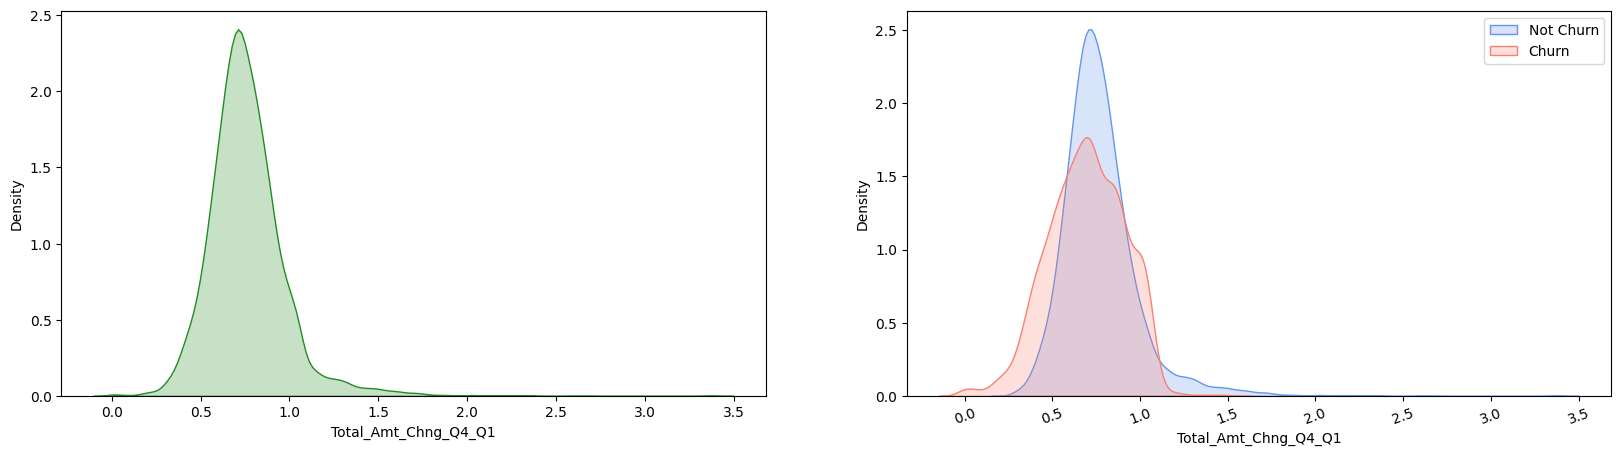

In [27]:
# 總交易額 (過去12個月)
plot_distplot('Total_Trans_Amt')
# 交易金額變化 (Q1-Q4)
plot_distplot('Total_Amt_Chng_Q4_Q1')

從過去12月的總交易金額(Total_Trans_Amt)來看，與現有客戶相比，流失客戶的總交易金額較低。


### 2.3.10 Transaction Count Change   

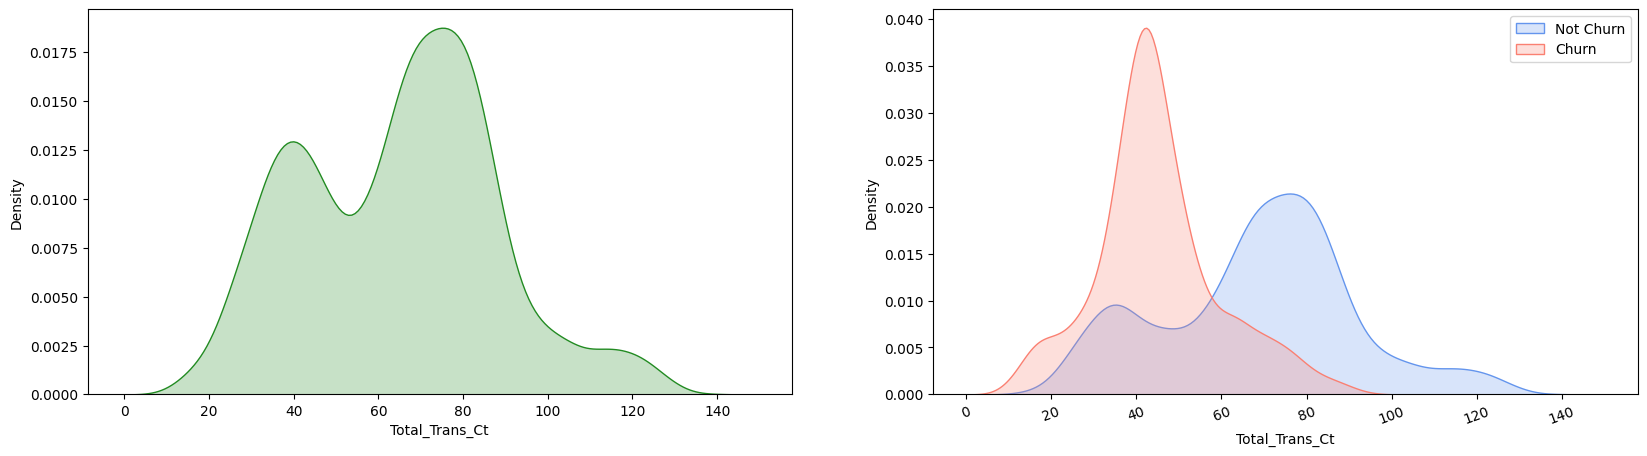

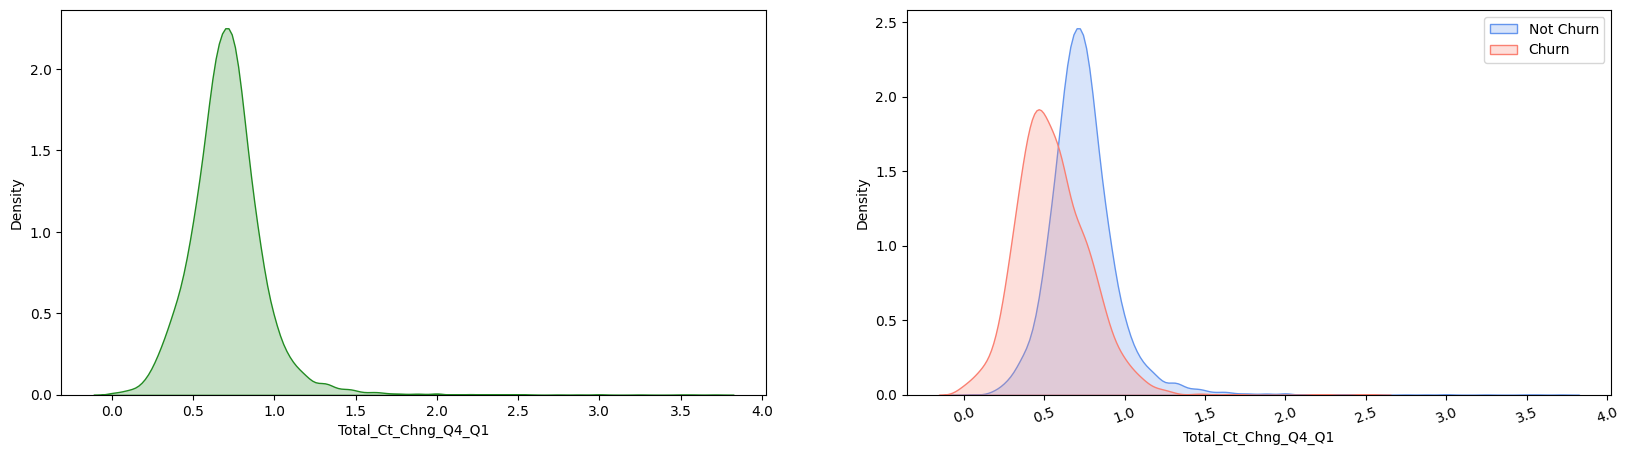

In [28]:
# 總交易數 (過去12個月)
plot_distplot('Total_Trans_Ct')
# 交易計數變化(Q1-Q4)
plot_distplot('Total_Ct_Chng_Q4_Q1')

從過去12月的總交易數(Total_Trans_Ct)來看，流失客戶的交易次數大多低於現有客戶。
而從交易計數變化（第4季度-第1季度）(Total_Ct_Chng_Q4_Q1) 來看，同樣分佈之間存在差異，留存客戶的平均數值更高。

### 2.3.11 Average Card Utilization Ratio 

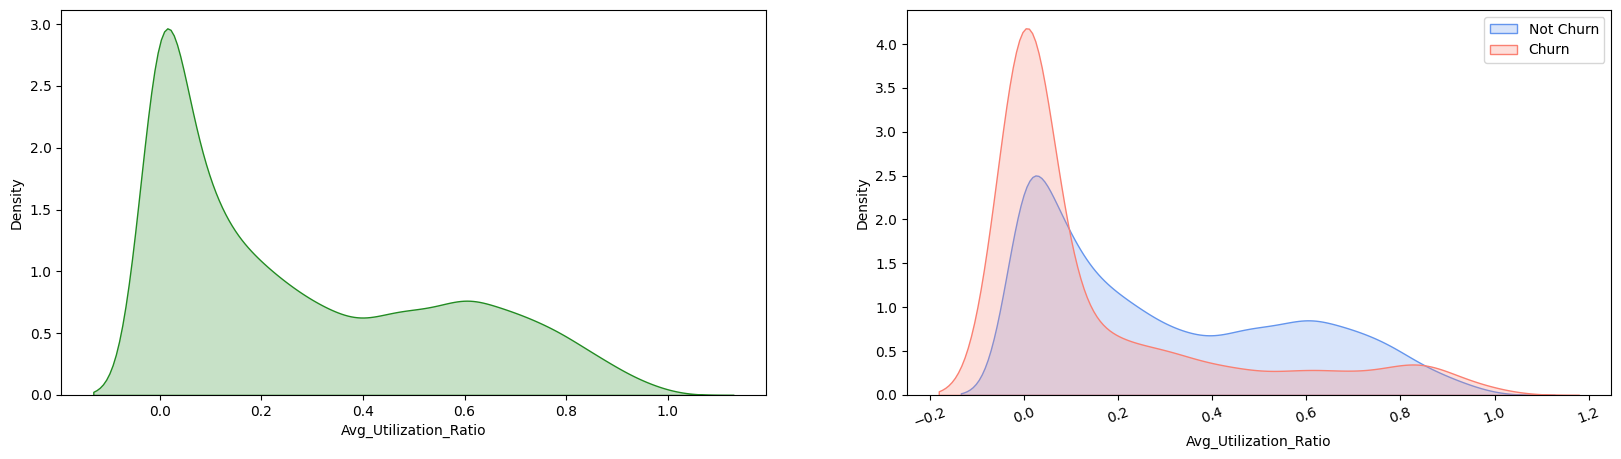

In [29]:
# 平均卡利用率
plot_distplot('Avg_Utilization_Ratio')

從卡片的平均利用率 (Avg_Utilization_Ratio)來看，流失客戶的卡利用率較留存客戶低。


<b> 小結 <b>
    
1. 分佈狀態有明顯差異，推論與流失「有相關」的特徵：Total_Relationship_Count、Months_Inactive_12_mon、Contacts_Count_12_mon、Total_Revolving_Bal、Total_Trans_Amt、Total_Trans_Ct、Total_Ct_Chng_Q4_Q1、Avg_Utilization_Ratio
2. 分佈狀態無較大差異，推論與流失較「無相關」的特徵 : Type of card、Months_on_book、Credit_Limit、Avg_Open_To_Buy、Total_Amt_Chng_Q4_Q1

## 2.4 Correlation

* We measure numerical data correlation via Pearson.

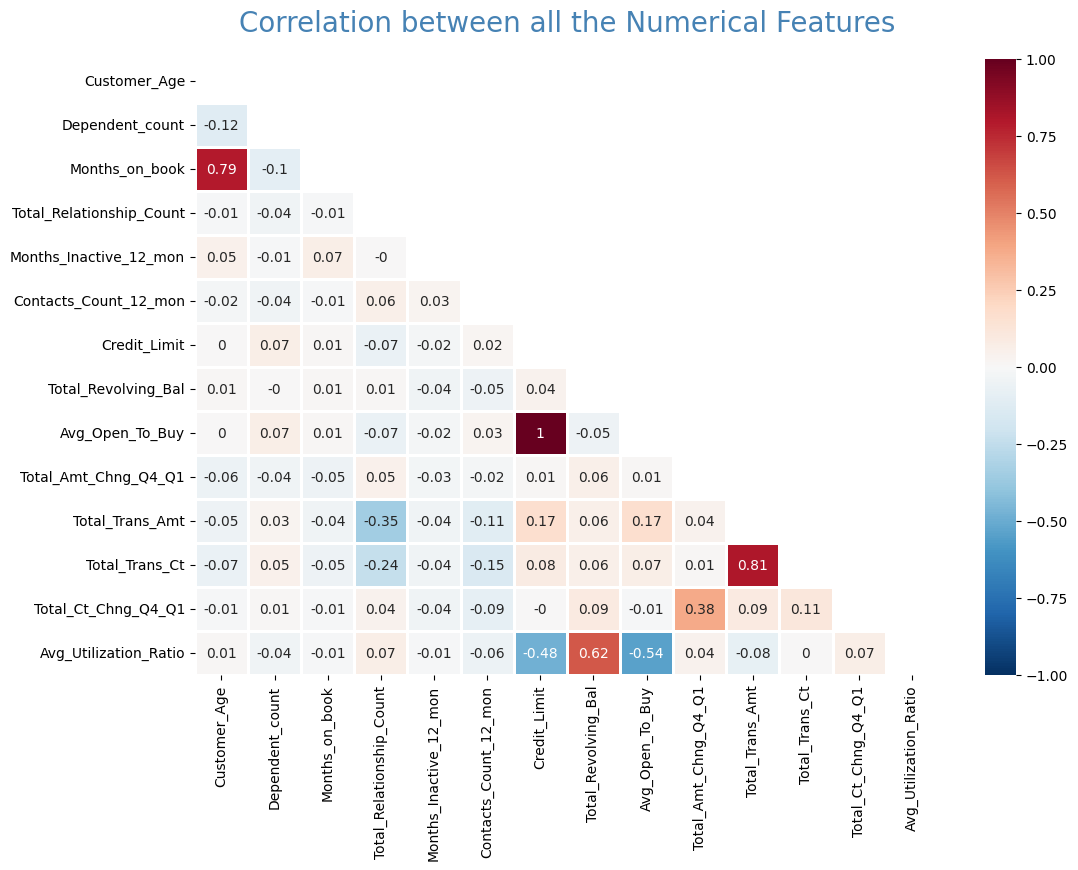

In [30]:
heat = df[num_cols].corr().round(2)
plt.figure(figsize=[12,8])
plt.title("Correlation between all the Numerical Features", size=20, pad=20, color='steelBlue')
mask = np.triu(np.ones_like(heat, dtype=bool)) 
sns.heatmap(heat, mask=mask, cmap="RdBu_r", annot=True,linewidths=2,linecolor='white', vmin=-1, vmax=1) 
plt.show()

發現Credit_limit與Avg_Open_To_Buy的相關性=1，屬於完全相關，所以之後可以移除其中一個column。

* Measure categorical data via Cramer's V statistic.

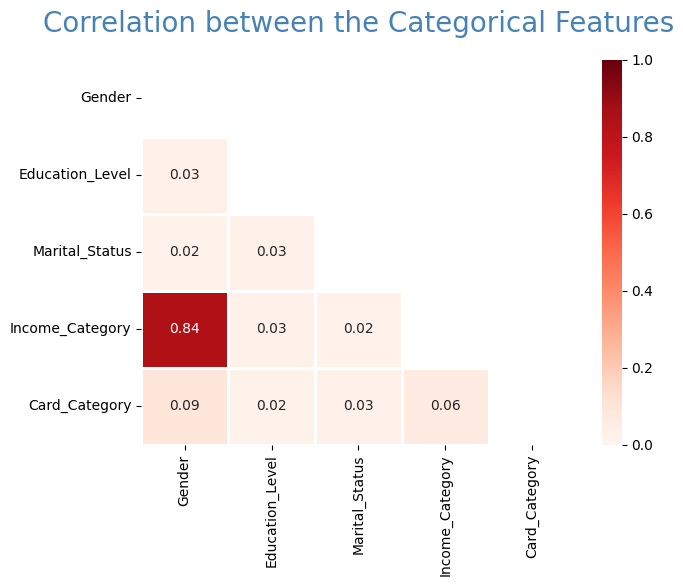

In [31]:
# Convert object columns to Category columns
df_cat = df[cat_cols].apply(lambda x: x.astype("category") if x.dtype == "O" else x)
# Initialize a CramersV object using the DataFrame
cramers_v = am.CramersV(df_cat)
# It will return a pairwise matrix filled with Cramer's V
cramers_v_corr = cramers_v.fit().round(2)

# plot
plt.figure(figsize=[7,5])
plt.title("Correlation between the Categorical Features", size=20, pad=20, color='steelBlue')
mask = np.triu(np.ones_like(cramers_v_corr, dtype=bool)) # 上三角
sns.heatmap(cramers_v_corr, mask=mask, cmap="Reds", annot=True,linewidths=2,linecolor='white', vmin=0, vmax=1) 
plt.show()

## 2.5 Outlier

### 2.5.1 Boxplot

In [32]:
def plot_boxplot(nums, data):   
    
    fig, axes = plt.subplots(5, 3, figsize=(18,18))
    axes = axes.flatten()
    fig.suptitle('Box Plots for Numerical Features',fontsize=20)
    
    for ax, num in zip(axes, nums):
        sns.boxplot(y=num,data=data,ax=ax,color='#e74c3c')

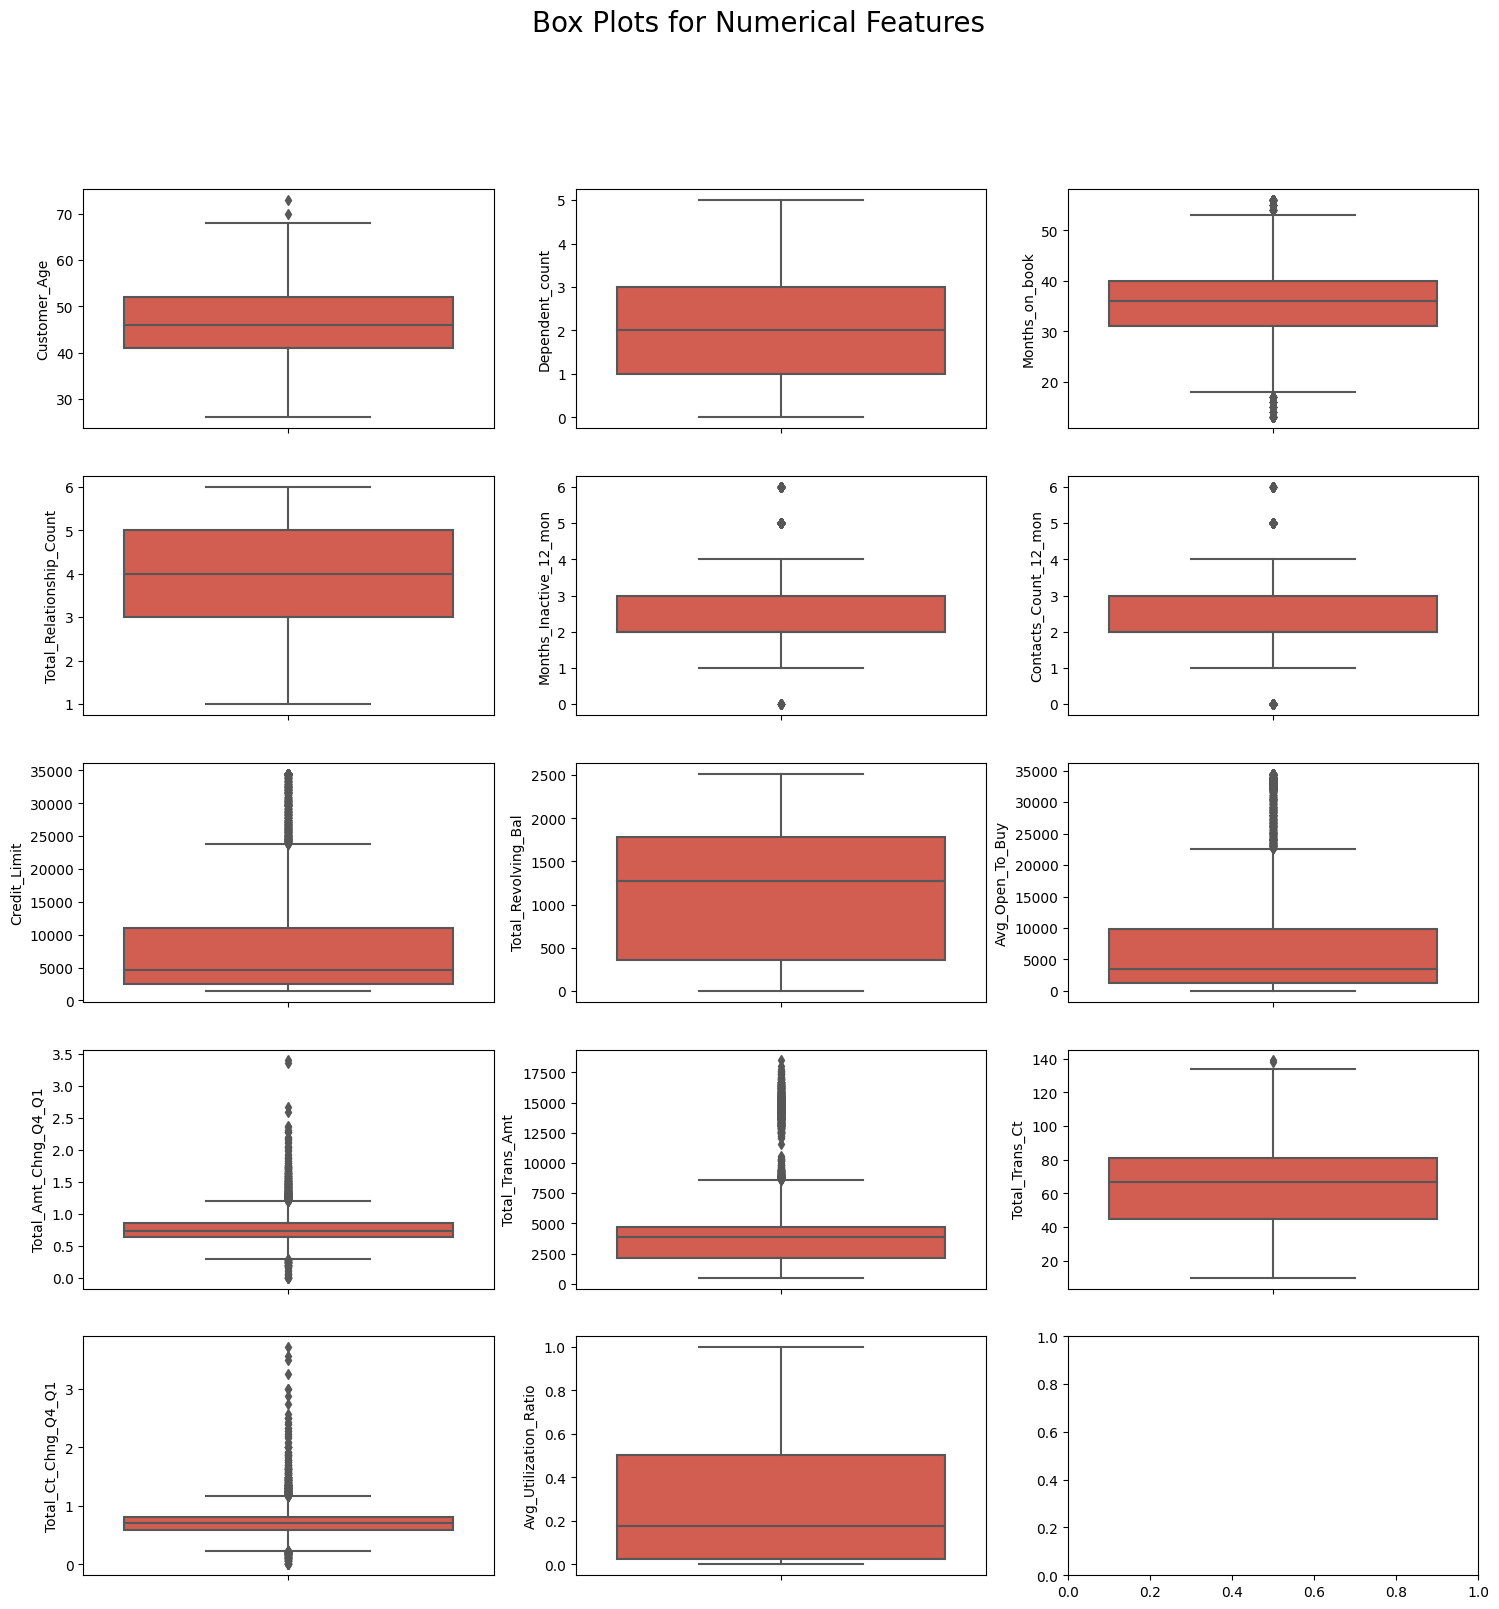

In [33]:
plot_boxplot(num_cols,df)

### 2.5.2 Outlier detect

*  First, remove the column with full correlation

In [34]:
# First, remove the column with full correlation
df_drop = df.drop(['Avg_Open_To_Buy'], axis=1)

* Outlier detect

In [35]:
# Outlier detection 
def detect_outliers(df, n, num_feature):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according  to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in num_feature:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index       
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than n outliers
    outlier_indices = Counter(outlier_indices)       
    multiple_outliers = list( k for k, v in outlier_indices.items() if v >= n ) 
    
    return multiple_outliers  

In [36]:
num_cols.remove('Avg_Open_To_Buy')

# Detect the number of samples with 1/2 outliers 
trash_ind_1 = detect_outliers(df_drop, 1, num_cols)
trash_ind_2 = detect_outliers(df_drop, 2, num_cols)

out1 = df_drop.loc[trash_ind_1,:]
out2 = df_drop.loc[trash_ind_2,:]

print('Total number of samples with 1 outlier is {}, and the amount of Attrited Customer in outliers is {}'.format(len(trash_ind_1), len(out1[out1['Attrition_Flag']=='Attrited Customer'])))
print('Total number of samples with 2 outlier is {}, and the amount of Attrited Customer in outliers is {}'.format(len(trash_ind_2), len(out2[out2['Attrition_Flag']=='Attrited Customer'])))

Total number of samples with 1 outlier is 3316, and the amount of Attrited Customer in outliers is 499
Total number of samples with 2 outlier is 639, and the amount of Attrited Customer in outliers is 107


* 由於擁有一個outlier的樣本數偏多(且Attrited Customer也多)，全刪除會喪失很多有用資訊，因此選擇刪除要擁有兩個outliers以上的樣本。

In [37]:
df_out = df_drop.drop(trash_ind_2, axis = 0).reset_index(drop=True)
print ('The amount of frauds in df before dropping outliers: ', len(df[df['Attrition_Flag']=='Attrited Customer']))
print ('The amount of frauds in df after dropping outliers: ', len(df_out[df_out['Attrition_Flag']=='Attrited Customer']))

The amount of frauds in df before dropping outliers:  1627
The amount of frauds in df after dropping outliers:  1520


# 3. Data preprocessing

## 3.1 Feature Encoding

* Nominal: Categories without a meaningful order or ranking like (Attrition Flag, Gender, Marital Status).
* Ordinal: Categories with a meaningful order or ranking like (Education Level, Income Category, Card Category).

In [38]:
data = df_out.copy() 
#  Changing the Attrition_Flag to 0 and 1 
data['Attrition_Flag'].replace({'Attrited Customer':1,'Existing Customer':0}, inplace=True)

# Working with Nominal Features with pandas `get_dummies` function.
data = pd.get_dummies(data,columns=['Marital_Status'], drop_first=True)
data['Gender'].replace({'F':1,'M':0}, inplace=True)

# Working with Ordinal Features with pandas `map` method.
Income_Category_map = {
    'Less than $40K' : 0,
    '$40K - $60K'    : 1,
    '$60K - $80K'    : 2,
    '$80K - $120K'   : 3,
    '$120K +'        : 4,
    'Unknown'        : 5
}


Card_Category_map = {
    'Blue'     : 0,
    'Silver'   : 1,
    'Gold'     : 2,
    'Platinum' : 3
}


Education_Level_map = {
    'Uneducated'    : 0,
    'High School'   : 1,
    'College'       : 2,
    'Graduate'      : 3,
    'Post-Graduate' : 4,
    'Doctorate'     : 5,
    'Unknown'       : 6
}


data['Income_Category'] = data['Income_Category'].map(Income_Category_map)
data['Card_Category'] = data['Card_Category'].map(Card_Category_map)
data['Education_Level'] = data['Education_Level'].map(Education_Level_map)

## 3.2 Split dataset

In [39]:
# Separate  features / target
X = data.drop(['Attrition_Flag'], axis=1)
Y = data['Attrition_Flag'] 

# Divide into training set / test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size=0.2, shuffle=True ,random_state=42)

# 4 Modeling

由於樣本量中還是有些 outliers，且為不平衡資料集，因此選擇使用隨機森林(Random Forest)模型。

而主要評估指標是 Recall，也就是實際會流失的客群被正確判斷出來的比例。

In [40]:
# Define various indicator scores of cross validation
def cv_score(pipe, x_train, y_train, cv_n):
    recall = cross_val_score(pipe, x_train, y_train, cv=cv_n, scoring='recall').mean()
    precision = cross_val_score(pipe, x_train, y_train, cv=cv_n, scoring='precision').mean()
    f1 = cross_val_score(pipe, x_train, y_train, cv=cv_n, scoring='f1').mean()
    auc = cross_val_score(pipe, x_train, y_train, cv=cv_n, scoring='roc_auc').mean()
    accuracy = cross_val_score(pipe, x_train, y_train, cv=cv_n, scoring='accuracy').mean()

    print('Recall scores:', recall)
    print('Precision scores:', precision)
    print('F1 scores:', f1)
    print('Roc_Auc scores:', auc)
    print('Accuracy scores:', accuracy)

## 4.1 Basic

In [41]:
rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))
cv_score(rf_pipe, x_train, y_train, cv_n=3)

Recall scores: 0.7993289951144358
Precision scores: 0.9255829970546844
F1 scores: 0.8577950037421499
Roc_Auc scores: 0.98713790659888
Accuracy scores: 0.9575757575757575


## 4.2 Basic + Smote

In [42]:
rf_sm_pipe = make_pipeline(StandardScaler(),  SMOTE(random_state=42), RandomForestClassifier(random_state=42))
cv_score(rf_sm_pipe, x_train, y_train, cv_n=3)

Recall scores: 0.8568975653266842
Precision scores: 0.8555385826586374
F1 scores: 0.8562119532250064
Roc_Auc scores: 0.9850303821512009
Accuracy scores: 0.9538866930171278


## 4.3 Basic + Smote + Gridsearch

In [43]:
RF_params = {
    'randomforestclassifier__n_estimators':[50, 100, 150, 200], 
    'randomforestclassifier__max_depth':[6, 7, 8], 
    'randomforestclassifier__max_features':[6, 7, 8, 9]   
    #'randomforestclassifier__min_samples_split' : [100, 150, 200],   
    #'randomforestclassifier__min_samples_leaf' : [30, 40, 60],    
    }

RF_grid = GridSearchCV(rf_sm_pipe, param_grid=RF_params, cv=3, scoring='recall', n_jobs = -1, refit=True) 

# train
RF_grid.fit(x_train,y_train)


print("Best parameters of RandomForest: {}".format(RF_grid.best_params_))
print('-'*70)
print("Best recall score of RandomForest: {}".format(RF_grid.best_score_))

Best parameters of RandomForest: {'randomforestclassifier__max_depth': 7, 'randomforestclassifier__max_features': 8, 'randomforestclassifier__n_estimators': 150}
----------------------------------------------------------------------
Best recall score of RandomForest: 0.9128261266192301


# 5. Evaluation on Test data

In [44]:
def evaluaion(y_test, y_pred):
    # ------  Report ------ 
    print('Classification Report:')
    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(' ')
    print('Recall: {0}'.format(recall_score(y_test, y_pred)))
    print('Precision: {0}'.format(precision_score(y_test, y_pred)))
    print('F1 score: {0}'.format(f1_score(y_test, y_pred)))
    print('Accuracy: {0}'.format(accuracy_score(y_test, y_pred, normalize=True)))
    print('-'*80)
    print(' ')

    
    # ------  Confusion Matrix  ------ 
    print('Confusion Matrix:')
    fig, ax = plt.subplots(figsize=(5, 5))
    ConfusionMatrixDisplay.from_predictions(y_test, 
                                            y_pred,
      										display_labels=["Existing Customer", "Attrited Customer"],
    										ax=ax,
    										cmap=plt.cm.Blues,
    										colorbar=True)
    plt.show()
    print('-'*80)
    print(' ')

    # ------ AUC plot -------
    score = roc_auc_score(y_test, y_pred)
    print("AUC : ", score)

    fpr, tpr, threshold = roc_curve(y_test, y_pred)

    # plot
    plt.figure(figsize=(6,4))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.4f)' % score)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()


## 5.1 Basic

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1594
           1       0.94      0.84      0.89       304

    accuracy                           0.97      1898
   macro avg       0.95      0.91      0.93      1898
weighted avg       0.96      0.97      0.96      1898

 
Recall: 0.8388157894736842
Precision: 0.9375
F1 score: 0.8854166666666666
Accuracy: 0.9652265542676501
--------------------------------------------------------------------------------
 
Confusion Matrix:


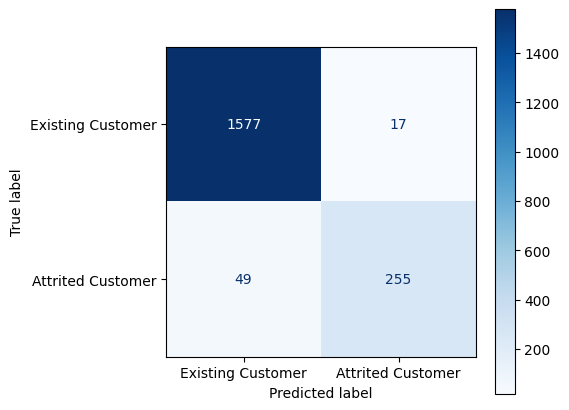

--------------------------------------------------------------------------------
 
AUC :  0.9140753978736049


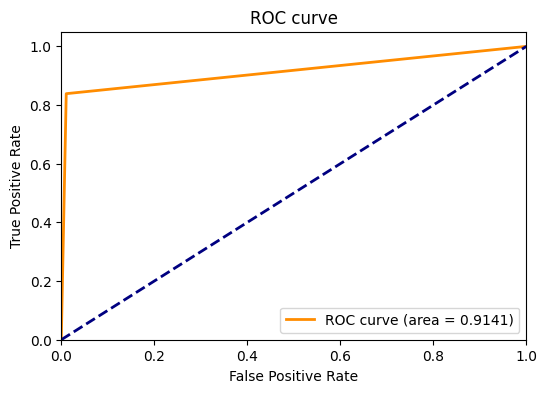

In [45]:
# fit
rf_pipe.fit(x_train, y_train)
# predict
y_pred = rf_pipe.predict(x_test)
# result
evaluaion(y_test, y_pred)

## 5.2  Basic + SMOTE

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1594
           1       0.89      0.87      0.88       304

    accuracy                           0.96      1898
   macro avg       0.93      0.92      0.93      1898
weighted avg       0.96      0.96      0.96      1898

 
Recall: 0.8651315789473685
Precision: 0.8855218855218855
F1 score: 0.8752079866888519
Accuracy: 0.9604847207586934
--------------------------------------------------------------------------------
 
Confusion Matrix:


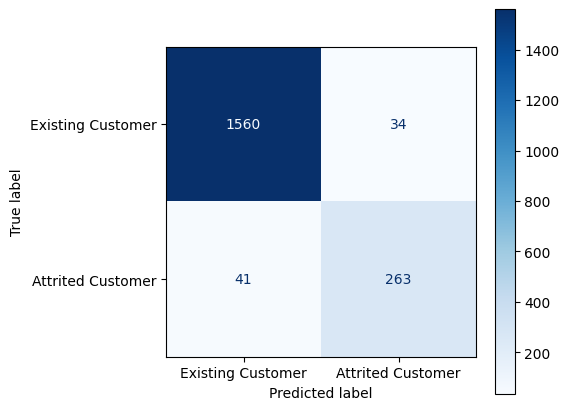

--------------------------------------------------------------------------------
 
AUC :  0.92190079574721


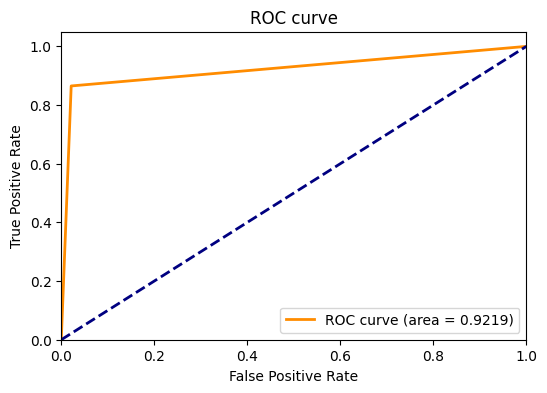

In [46]:
# fit
rf_sm_pipe.fit(x_train, y_train)
# predict
y_pred = rf_sm_pipe.predict(x_test)
# result
evaluaion(y_test, y_pred)

## 5.3  Basic + SMOTE + Gridsearch

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1594
           1       0.79      0.91      0.85       304

    accuracy                           0.95      1898
   macro avg       0.89      0.93      0.91      1898
weighted avg       0.95      0.95      0.95      1898

 
Recall: 0.9144736842105263
Precision: 0.7897727272727273
F1 score: 0.8475609756097561
Accuracy: 0.9473129610115911
--------------------------------------------------------------------------------
 
Confusion Matrix:


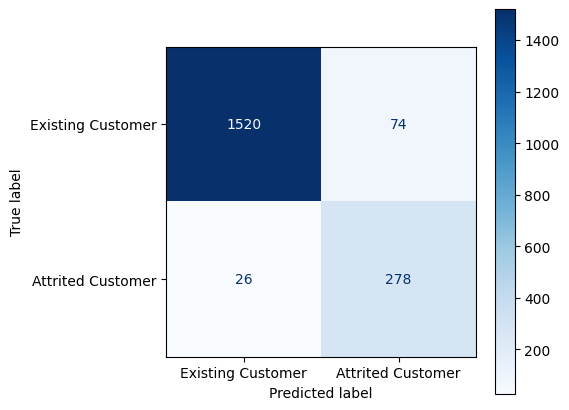

--------------------------------------------------------------------------------
 
AUC :  0.934024796935878


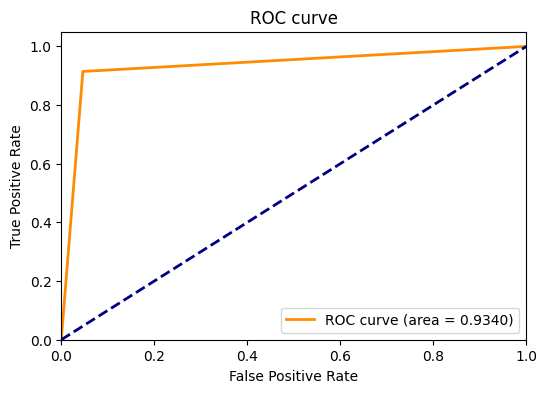

In [47]:
# prediction
y_pred = RF_grid.predict(x_test)
# result
evaluaion(y_test, y_pred)

## 5.4 Feature Importances

In [50]:
importances = RF_grid.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
feature = pd.Series(importances, index = x_train.columns).sort_values(ascending = True)
print(feature.sort_values(ascending = False))

Total_Trans_Ct              0.312584
Total_Trans_Amt             0.263693
Total_Revolving_Bal         0.114691
Total_Ct_Chng_Q4_Q1         0.080232
Total_Relationship_Count    0.065009
Months_Inactive_12_mon      0.042763
Total_Amt_Chng_Q4_Q1        0.032326
Avg_Utilization_Ratio       0.028536
Customer_Age                0.016134
Contacts_Count_12_mon       0.012204
Credit_Limit                0.010157
Months_on_book              0.005562
Dependent_count             0.005079
Gender                      0.004630
Income_Category             0.001800
Education_Level             0.001545
Marital_Status_Married      0.000967
Card_Category               0.000908
Marital_Status_Single       0.000849
Marital_Status_Unknown      0.000330
dtype: float64


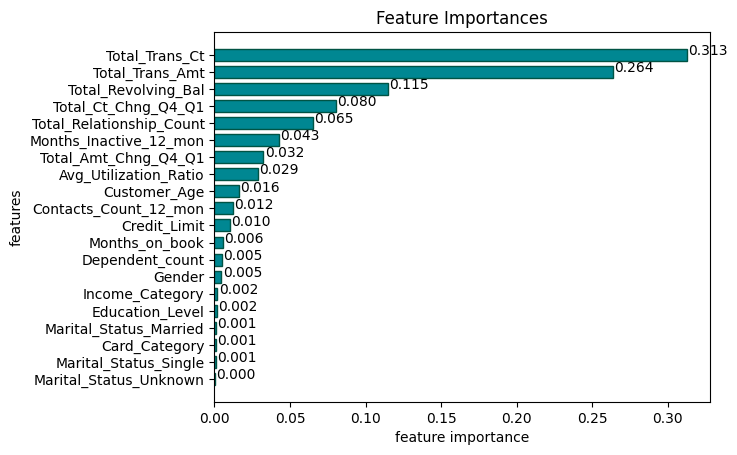

In [51]:
# plot bar chart
plt.barh(feature.index, feature.values, height=0.7, color='#008792', edgecolor='#005344') 
plt.xlabel('feature importance') 
plt.ylabel('features') 
plt.title('Feature Importances') 
for a,b in zip(feature.values,feature.index): 
   plt.text(a+0.001, b,'%.3f'%float(a)) 
plt.show()

* 重要特徵 跟 EDA 中有明顯差異的特徵 有關連。

  前 3 個最有影響力的特徵是產品變量：“Total_Trans_Ct”、“Total_Trans_Amt”、“Total_Revolving_Bal”。


# 6 Conclusion

使用 隨機森林model, 結果
* Basic : recall 為 83.88 % ; precision 為 93.75 % ; F1 為 88.54 % ; Accuracy 為 96.52 %
* Basic + SMOTE : recall 為 86.51% ; precision 為 88.55 %  ; F1 為 87.52 % ; Accuracy 為 96.05% 
* Basic + SMOTE + GridSearch : recall 為 91.45% ; precision 為 78.98 % ; F1 為 84.76 % ; Accuracy 為 94.74 %

結論：

* (1)	SMOTE過採樣技術能有效提升Recall，從而更好地識別潛在流失客戶。
* (2)	超參數優化能進一步提高Recall，卻同時降低了Precision，也就是模型可能會誤識一些非流失客戶為流失客戶。
* (3)	第三種方法具有最高的Recall，但Precision最低，而第二種方法在Recall和F1 score均表現出色，同時保持較高的Precision。根據實際業務需求和風險承受能力，可以權衡這兩種方法選擇最適合的解決方案。
* (4)	由於重要特徵與信用卡交易相關，可以藉此作為切入點，深入分析並提供針對性的行銷策略和服務，以挽回即將流失的客戶。